### Copied from https://github.com/montagdude/weissinger

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [2]:
from wing import Wing
from weissinger import weissinger_l

# (slightly more hang-glider shape than the standard example)
alpha   = 5         # Geometric angle of attack at root, degrees
span    = 15       # Wing span
root    = 2.5        # Root chord
tip     = 0.2         # Tip chord
sweep   = 20        # Sweep of quarter-chord, degrees
washout = 5         # Downward twist at tip, degrees
npoints = 21        # Number of points to evaluate on wing half

wing = Wing(span, root, tip, sweep, washout)
y, cl, ccl, al_i, CL, CDi = weissinger_l(wing, alpha, 2*npoints-1)

print("{:<6}".format("Area: ") + str(wing.area))
print("{:<6}".format("AR: ") + str(wing.aspect_ratio))
print("{:<6}".format("MAC: ") + str(wing.cbar))
print("{:<6}".format("CL: ") + str(CL))
print("{:<6}".format("CDi: ") + str(CDi))


Calculating aerodynamics ...
Area: 20.25
AR:   11.11111111111111
MAC:  1.6765432098765432
CL:   0.281182664967
CDi:  0.00373401770711


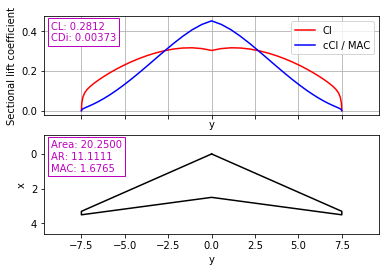

In [3]:
# Plot the wing shape
npt = y.shape[0]
y = np.hstack((y, np.flipud(-y[0:npt-1])))
cl = np.hstack((cl, np.flipud(cl[0:npt-1])))
ccl = np.hstack((ccl, np.flipud(ccl[0:npt-1])))

fig, axarr = plt.subplots(2, sharex=True)

axarr[0].plot(y, cl, 'r', y, ccl/wing.cbar, 'b' )
axarr[0].set_xlabel('y')
axarr[0].set_ylabel('Sectional lift coefficient')
axarr[0].legend(['Cl', 'cCl / MAC'], numpoints=1)
axarr[0].grid()
axarr[0].annotate("CL: {:.4f}\nCDi: {:.5f}".format(CL,CDi), xy=(0.02,0.95), 
                xycoords='axes fraction', verticalalignment='top', 
                bbox=dict(boxstyle='square', fc='w', ec='m'), color='m')

wing.plot(axarr[1])
